In [6]:
import os
import quandl

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12,6)})

In [9]:
key = os.environ.get('QUANDL_KEY')

In [10]:
quandl.ApiConfig.api_key = key

In [12]:
assets = ['SWKS', 'TSM', 'NVDA', 'AMAT', 'SOXL']
benchmarks = ['SOXX', 'QQQ', 'SPY']
all_names = assets + benchmarks

In [13]:
eod={}
close={}
rel={}
for ticker in all_names:
    eod[ticker] = 'EOD/%s' % ticker
    close[ticker] = 'EOD/%s - Close' % ticker
    rel[ticker] = '%s-rel' % ticker 
list(eod.values())

['EOD/SWKS',
 'EOD/TSM',
 'EOD/NVDA',
 'EOD/AMAT',
 'EOD/SOXL',
 'EOD/SOXX',
 'EOD/QQQ',
 'EOD/SPY']

In [14]:
start='2018-10-1'
frequency='daily'

data = quandl.get(list(eod.values()), collapse=frequency, trim_start=start) # , trim_end=end)
data = data[list(close.values())]
data.columns=list(all_names)
data.head()

,SWKS,TSM,NVDA,AMAT,SOXL,SOXX,QQQ,SPY
Date,,,,,,,,
2018-10-01,91.45,44.66,289.36,38.34,155.90,185.69,186.17,291.73
2018-10-02,91.88,43.62,286.48,38.90,156.15,185.69,185.75,291.56
2018-10-03,92.45,43.96,286.73,38.92,156.41,185.86,185.95,291.72
2018-10-04,91.05,42.43,279.29,37.89,148.00,182.57,182.38,289.44
2018-10-05,87.55,41.63,269.86,37.24,137.55,178.25,180.15,287.82


In [15]:
tsm = 1300
swks = 800
nvda = 150
amat = 800
num = (tsm + swks + nvda + amat)
weights = {
    'TSM': tsm/num,
    'SWKS': swks/num,
    'NVDA': nvda/num,
    'AMAT': amat/num,
}

In [16]:
for ticker in all_names:
    data['%s-rel' % ticker] = data [ticker] / data [ticker][0]

In [17]:
data.head()

,SWKS,TSM,NVDA,AMAT,SOXL,SOXX,QQQ,SPY,SWKS-rel,TSM-rel,NVDA-rel,AMAT-rel,SOXL-rel,SOXX-rel,QQQ-rel,SPY-rel
Date,,,,,,,,,,,,,,,,
2018-10-01,91.45,44.66,289.36,38.34,155.90,185.69,186.17,291.73,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-10-02,91.88,43.62,286.48,38.90,156.15,185.69,185.75,291.56,1.004702,0.976713,0.990047,1.014606,1.001604,1.000000,0.997744,0.999417
2018-10-03,92.45,43.96,286.73,38.92,156.41,185.86,185.95,291.72,1.010935,0.984326,0.990911,1.015128,1.003271,1.000916,0.998818,0.999966
2018-10-04,91.05,42.43,279.29,37.89,148.00,182.57,182.38,289.44,0.995626,0.950067,0.965199,0.988263,0.949326,0.983198,0.979642,0.992150
2018-10-05,87.55,41.63,269.86,37.24,137.55,178.25,180.15,287.82,0.957354,0.932154,0.932610,0.971309,0.882296,0.959933,0.967664,0.986597


In [18]:
for ticker in weights.keys():
    data['%s-w' % ticker] = data ['%s-rel' % ticker] * weights[ticker]

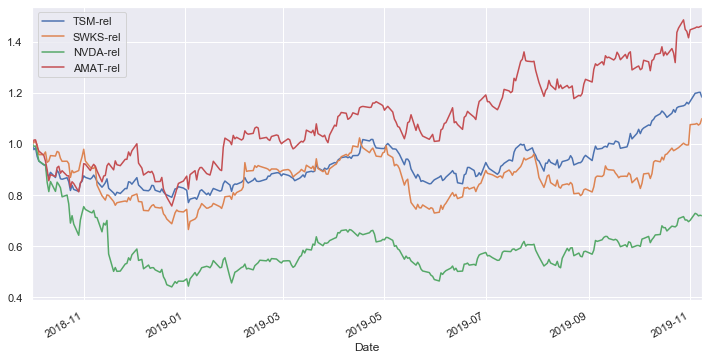

In [19]:
data[['TSM-rel', 'SWKS-rel', 'NVDA-rel', 'AMAT-rel']].plot();

In [20]:
data['portfolio'] = data['TSM-w'] +  data['SWKS-w'] +  data['NVDA-w'] +  data['AMAT-w']  

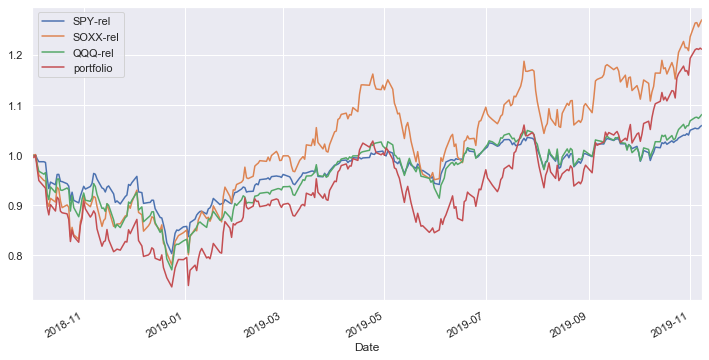

In [21]:
data[ ['SPY-rel', 'SOXX-rel', 'QQQ-rel', 'portfolio']].plot();

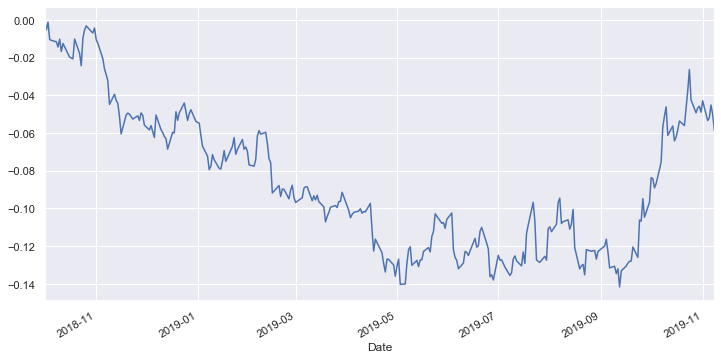

In [22]:
(data['portfolio'] - data['SOXX-rel']).plot();

In [23]:
def compare_since(data, date, plot=True):
    
    recent = data.query("index > '%s'" % date)

    for ticker in all_names + ['portfolio']:
        recent['%s-rel' % ticker] = recent[ticker] / recent[ticker][0]

    comp = recent[ ['SPY-rel', 'SOXX-rel', 'QQQ-rel', 'portfolio-rel']]
    
    if plot:
        comp.plot()
        
    return comp

,SPY-rel,SOXX-rel,QQQ-rel,portfolio-rel
Date,,,,
2019-10-02,1.000000,1.000000,1.000000,1.000000
2019-10-03,1.008193,1.017590,1.010975,1.014208
2019-10-04,1.021836,1.034501,1.025863,1.034693
2019-10-07,1.017427,1.028444,1.022766,1.039132
2019-10-08,1.001632,0.996608,1.007444,1.022948
2019-10-09,1.011144,1.012889,1.017278,1.046106
2019-10-10,1.017982,1.022775,1.025156,1.061616
2019-10-11,1.028536,1.046906,1.038359,1.073010
2019-10-14,1.027390,1.046761,1.038250,1.077711


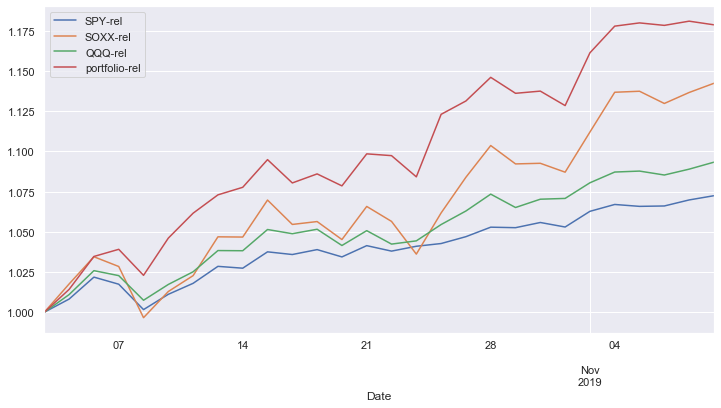

In [24]:
compare_since(data, '2019-10-01')

In [26]:
data['SPY-1'] = data['SPY-rel'] - 1
data['QQQ-SPY'] = data['QQQ-rel'] - data['SPY-rel']
data['SOXX-QQQ'] = data['SOXX-rel'] - data['QQQ-rel']
data['p-SOXX'] = data['portfolio'] - data['SOXX-rel']

# Volatility

In [27]:
for name in all_names:
    data["%s-delta" % name] = np.log(data[name] / data[name].shift())
data["portfolio-delta"] = np.log(data['portfolio'] / data['portfolio'].shift())

In [28]:
data.dropna(inplace=True)
data.head()

,SWKS,TSM,NVDA,AMAT,SOXL,SOXX,QQQ,SPY,SWKS-rel,TSM-rel,...,p-SOXX,SWKS-delta,TSM-delta,NVDA-delta,AMAT-delta,SOXL-delta,SOXX-delta,QQQ-delta,SPY-delta,portfolio-delta
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-02,91.88,43.62,286.48,38.90,156.15,185.69,185.75,291.56,1.004702,0.976713,...,-0.005351,0.004691,-0.023562,-0.010003,0.014501,0.001602,0.000000,-0.002259,-0.000583,-0.005365
2018-10-03,92.45,43.96,286.73,38.92,156.41,185.86,185.95,291.72,1.010935,0.984326,...,-0.001207,0.006185,0.007764,0.000872,0.000514,0.001664,0.000915,0.001076,0.000549,0.005073
2018-10-04,91.05,42.43,279.29,37.89,148.00,182.57,182.38,289.44,0.995626,0.950067,...,-0.010418,-0.015259,-0.035424,-0.026290,-0.026821,-0.055268,-0.017860,-0.019385,-0.007846,-0.027306
2018-10-05,87.55,41.63,269.86,37.24,137.55,178.25,180.15,287.82,0.957354,0.932154,...,-0.010877,-0.039199,-0.019035,-0.034347,-0.017304,-0.073225,-0.023947,-0.012303,-0.005613,-0.024689
2018-10-08,87.57,40.96,265.77,36.59,132.67,176.26,179.05,287.82,0.957572,0.917152,...,-0.011639,0.000228,-0.016225,-0.015272,-0.017608,-0.036123,-0.011227,-0.006125,0.000000,-0.012169


In [29]:
data['portfolio-m10'] = data['portfolio'].rolling('10d').mean()

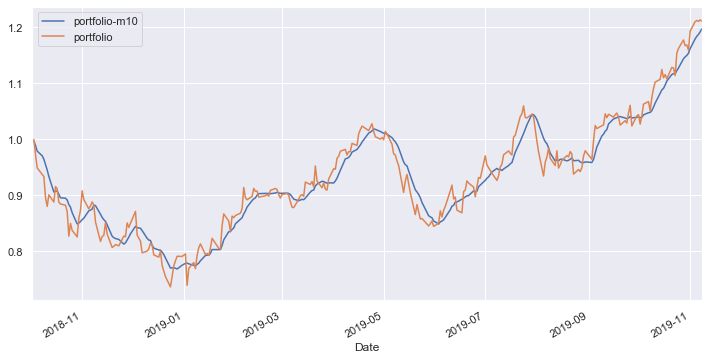

In [30]:
data[['portfolio-m10', 'portfolio']].plot()

In [31]:
data['portfolio-v30'] = data['portfolio'].rolling('30d').std()

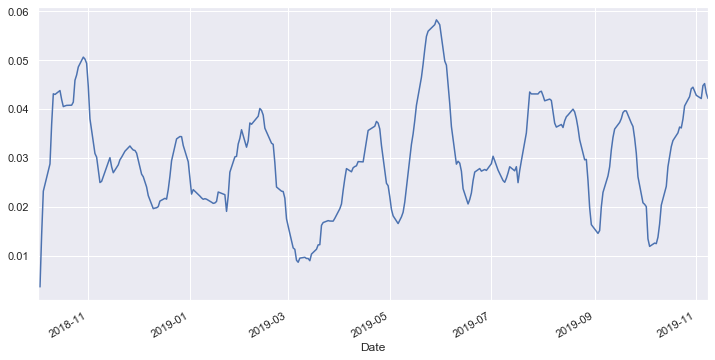

In [32]:
data['portfolio-v30'].plot()

# Christmas Surprise 2018
#### How my portfolio would have performed

In [33]:
start='2018-11-01'
end = '2019-01-31'
frequency='daily'

In [37]:
data = quandl.get(list(eod.values()), collapse=frequency, trim_start=start, trim_end=end)

In [39]:
data[list(close.values())].head()

,EOD/SWKS - Close,EOD/TSM - Close,EOD/NVDA - Close,EOD/AMAT - Close,EOD/SOXL - Close,EOD/SOXX - Close,EOD/QQQ - Close,EOD/SPY - Close
Date,,,,,,,,
2018-11-01,89.49,39.05,218.11,35.35,114.38,170.61,172.06,273.51
2018-11-02,85.27,38.78,214.92,35.27,109.25,168.04,169.38,271.89
2018-11-05,83.00,38.48,211.77,34.32,106.44,166.51,168.96,273.39
2018-11-06,82.64,38.73,211.06,34.87,110.30,168.45,170.24,275.12
2018-11-07,82.65,39.18,213.79,35.25,114.26,170.36,175.58,281.01


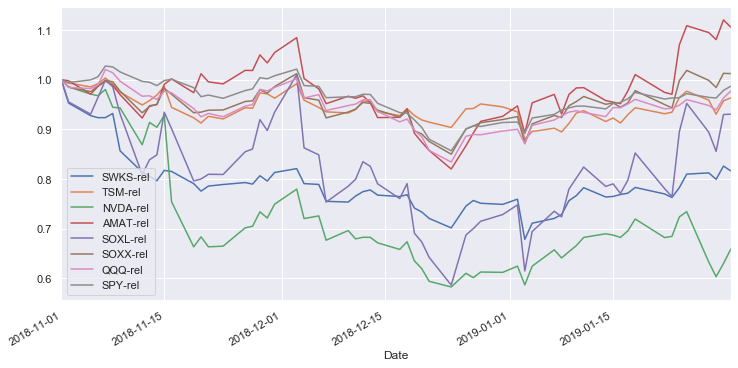

In [42]:
for ticker in all_names:
    data['%s-rel' % ticker] = data ['EOD/%s - Close' % ticker] / data ['EOD/%s - Close' % ticker][0]
data[list(rel.values())].plot();

In [43]:
(data['NVDA-rel']-data['NVDA-rel'].shift()).dropna().min()

-0.1740406217046443

In [44]:
tsm = 1300
swks = 800
nvda = 150
amat = 800
num = (tsm + swks + nvda + amat)
weights = {
    'TSM': tsm/num,
    'SWKS': swks/num,
    'NVDA': nvda/num,
    'AMAT': amat/num,
}

In [45]:
for ticker in weights.keys():
    data['%s-w' % ticker] = data ['%s-rel' % ticker] * weights[ticker]

In [46]:
data['portfolio'] = data['TSM-w'] +  data['SWKS-w'] +  data['NVDA-w'] +  data['AMAT-w']  

In [47]:
(data['portfolio']-data['portfolio'].shift()).dropna().min()

-0.06104719110642287

In [48]:
deltas = (data['portfolio']-data['portfolio'].shift(3)).dropna()
deltas.where(deltas == deltas.min()).dropna()

Date
2018-12-07   -0.081317
Name: portfolio, dtype: float64

In [49]:
ndays = [(data['portfolio']-data['portfolio'].shift(n)).dropna().min() for n in range(1, 6)]
ndays, min(ndays)

([-0.06104719110642287,
  -0.06977538197245303,
  -0.081317015015276,
  -0.07778951350715557,
  -0.07361751175077369],
 -0.081317015015276)

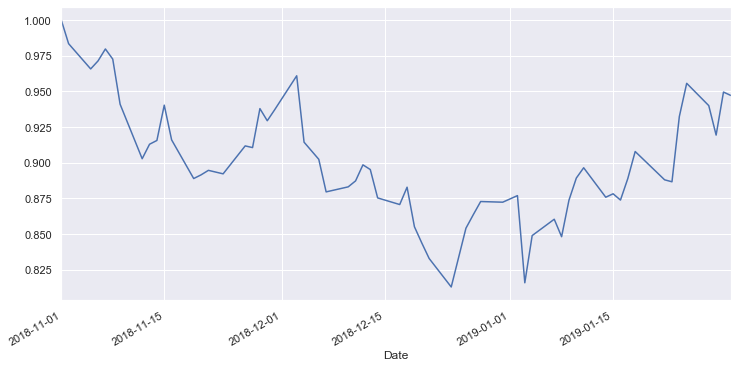

In [50]:
data['portfolio'].plot()

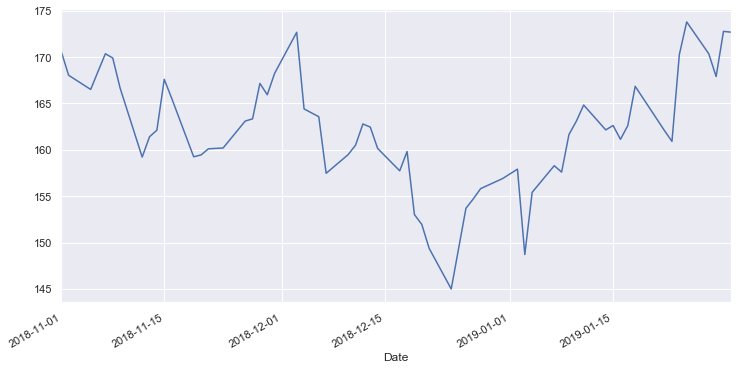

In [51]:
data['EOD/SOXX - Close'].plot();